# DBSCAN - Fine Tuning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
#from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
X = pd.read_csv('clusters_test.csv')

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.77723251, -0.11250866],
       [-0.28001811,  0.03377141],
       [-0.85480982, -0.91056236],
       ...,
       [ 1.60524125,  0.8701526 ],
       [ 2.32967858,  1.32853723],
       [-1.10757482, -0.87930563]])

(ɛ = 0.5, mins = 10)

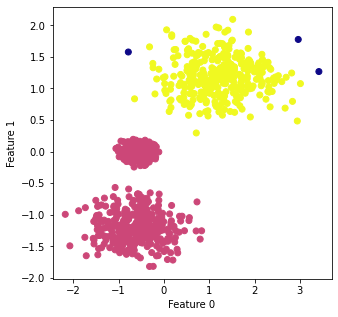

In [5]:
db=DBSCAN(eps=0.5,min_samples=10).fit(X_scaled)
labels=db.labels_

fig=plt.figure(figsize=(5,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels,cmap='plasma')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

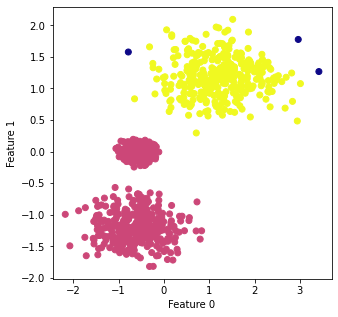

In [6]:
# cluster the data into five clusters
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)

# (ɛ = 0.5, mins = 10)
db = DBSCAN(eps=0.5, min_samples=10).fit(X_scaled)
labels = db.labels_
# plot the cluster assignments
fig = plt.figure(figsize=(5, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

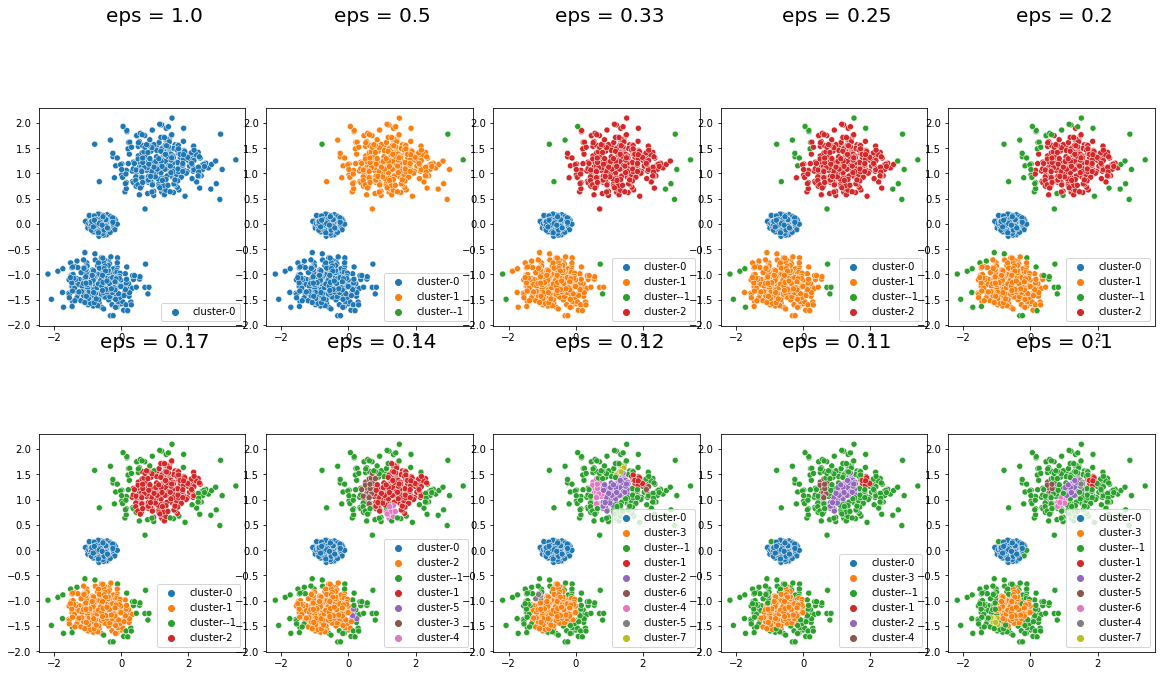

In [7]:
# This part is for fine tuning
# (Varied ɛ = 0.1 -> 1)
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.1)
i = 1
for x in range(10, 0, -1): # value:10-1
    eps = 1/(11-x) # 1/(11-10=1)=1
    db = DBSCAN(eps=eps, min_samples=10).fit(X_scaled)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    clusters = db.labels_
    ax = fig.add_subplot(2, 5, i)
    ax.text(1, 4, "eps = {}".format(round(eps, 2)), fontsize=20,    ha="center")
    sns.scatterplot(X_scaled[:,0], X_scaled[:,1], hue=["cluster-{}".format(x) for x in clusters])
    i += 1

Text(0, 0.5, 'Distance')

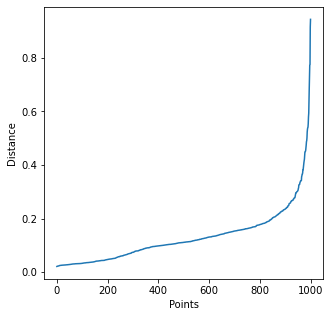

In [8]:
# Knee Locator
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X_scaled)
distances, indices = neighbors.kneighbors(X_scaled)

distances = np.sort(distances[:,10], axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex',
direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5)) 
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

0.22505908819096868


<Figure size 360x360 with 0 Axes>

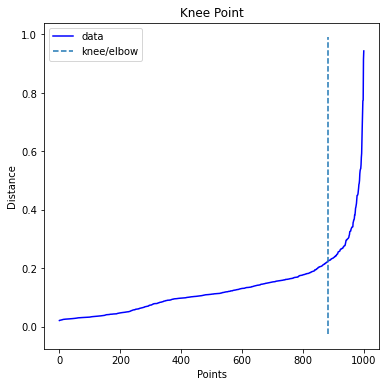

In [9]:
# Optimum Knee
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.savefig("knee.png", dpi=300)
print(distances[knee.knee])

<AxesSubplot:>

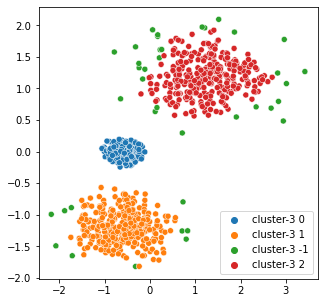

In [10]:
# with optimum eps
db = DBSCAN(eps=distances[knee.knee],
min_samples=10).fit(X_scaled) # reduce 10 ke bawah klu nak a bit loser
labels = db.labels_

fig = plt.figure(figsize=(5, 5))
sns.scatterplot(X_scaled[:,0], X_scaled[:,1], hue=["cluster-3 {}".format(x) for x in labels])

<AxesSubplot:>

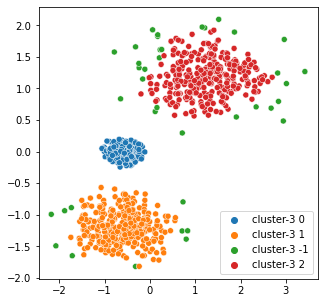

In [11]:
# with optimum eps
z = DBSCAN(eps=distances[knee.knee],
min_samples=5).fit(X_scaled)
labels = db.labels_

fig = plt.figure(figsize=(5, 5))
sns.scatterplot(X_scaled[:,0], X_scaled[:,1], hue=["cluster-3 {}".format(x) for x in labels])